<a href="https://colab.research.google.com/github/Thom204/OH202501/blob/main/OH_Taller_2_Solucion_de_modelos_con_Pyomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución Taller 2 Optimización Heurística
## Integrantes
- Maria Paulina Pupo Marin
- Thomas Monnier Granda
- Susana Silva Vallejo
- Sebastian Cepeda Jaimes



## Instalar las dependencias necesarias


In [1]:
#Instalar pyomo - cada vez que se use colab
!pip install -q pyomo

#Instalar un solver (solucionador) - GLPK (PL y PEM)
!apt-get install -y -qq glpk-utils

#Instalar el solver ipopt (PNL)
import matplotlib.pyplot as plt
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

#Importar el módulo pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

# Punto 2.

## Caso general (Nodos dados, pesos aleatorios).

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
'''TSP generalizado en pyomo usando distancias aleatorias del grafo
'''
def out_rule(model, j):
    return sum(model.x[i, j] for i in model.N if i != j) == 1


def in_rule(model, i):
    return sum(model.x[i, j] for j in model.N if j != i) == 1


# Restricciones MTZ para evitar subciclos
def mtz(model, i, j):
    if i != 0 and j != 0 and i != j:
        return model.u[i] - model.u[j] + len(model.N) * model.x[i, j] <= len(model.N) - 1
    return Constraint.Skip


model0 = ConcreteModel()

# Definir los nodos del grafo
model0.N = Set(initialize=range(0, int(input("ingrese cantidad de nodos: "))))

model0.A = Set(dimen=2, initialize=[
    (i, j) for i in model0.N for j in model0.N if i != j
])

rng= np.random.default_rng(seed = 1038866661)

costos0 = {
    (i, j): rng.integers(low = 1, high = 100, size = 1)[0] for (i, j) in model0.A
}

model0.c = Param(model0.A, initialize=costos0)
model0.x = Var(model0.A, domain=Binary)

model0.obj= Objective(
    expr=sum(model0.c[i, j] * model0.x[i, j] for (i, j) in model0.A),
    sense=minimize
)

model0.salida = Constraint(model0.N, rule=out_rule)
model0.entrada = Constraint(model0.N, rule=in_rule)

ingrese cantidad de nodos: 100


### Eliminacion de ciclos usando Miller Tucker Zemlin (MTZ)

In [20]:
model0.u = Var(model0.N, bounds=(0, len(model0.N)-1))
#Variable auxiliar u de orden forzado.

model0.mtz = Constraint(model0.A, rule=mtz)

### Solución del modelo

In [21]:
# Crear el solver
solver = SolverFactory('glpk')

# Resolver el modelo
results = solver.solve(model0)

print("Solución Óptima del encontrada")

ruta_dict = {i: j for (i, j) in model0.A if value(model0.x[i, j]) > 0.5}

# Iniciar la ruta desde el nodo 0
nodo_inicio = 0
nodo_actual = nodo_inicio

# Lista para guardar la secuencia de nodos
ruta = [nodo_actual]

# Reconstruir la ruta siguiendo los saltos en el diccionario
while True:
    siguiente = ruta_dict[nodo_actual]
    ruta.append(siguiente)
    nodo_actual = siguiente
    if nodo_actual == nodo_inicio:
        break

# Imprimir la ruta óptima
print("Ruta Óptima")
print(" → ".join(str(n) for n in ruta))

# Mostrar el costo total
print(f"Costo total mínimo: {value(model0.obj)}")

Solución Óptima del encontrada
Ruta Óptima
0 → 59 → 48 → 7 → 67 → 47 → 28 → 79 → 96 → 8 → 78 → 88 → 27 → 86 → 71 → 81 → 3 → 77 → 82 → 6 → 2 → 34 → 80 → 62 → 73 → 55 → 93 → 89 → 10 → 98 → 5 → 45 → 24 → 60 → 31 → 72 → 99 → 35 → 70 → 92 → 4 → 29 → 51 → 61 → 15 → 1 → 19 → 90 → 56 → 66 → 41 → 16 → 58 → 18 → 44 → 11 → 39 → 37 → 97 → 57 → 76 → 54 → 13 → 75 → 30 → 17 → 32 → 25 → 43 → 63 → 50 → 40 → 21 → 49 → 84 → 33 → 9 → 74 → 85 → 26 → 68 → 69 → 64 → 95 → 46 → 14 → 23 → 52 → 83 → 87 → 42 → 36 → 94 → 12 → 53 → 38 → 20 → 22 → 65 → 91 → 0
Costo total mínimo: 226.0


### Visualizacion del grafo (opcional)

0 → 59 → 48 → 7 → 67 → 47 → 28 → 79 → 96 → 8 → 78 → 88 → 27 → 86 → 71 → 81 → 3 → 77 → 82 → 6 → 2 → 34 → 80 → 62 → 73 → 55 → 93 → 89 → 10 → 98 → 5 → 45 → 24 → 60 → 31 → 72 → 99 → 35 → 70 → 92 → 4 → 29 → 51 → 61 → 15 → 1 → 19 → 90 → 56 → 66 → 41 → 16 → 58 → 18 → 44 → 11 → 39 → 37 → 97 → 57 → 76 → 54 → 13 → 75 → 30 → 17 → 32 → 25 → 43 → 63 → 50 → 40 → 21 → 49 → 84 → 33 → 9 → 74 → 85 → 26 → 68 → 69 → 64 → 95 → 46 → 14 → 23 → 52 → 83 → 87 → 42 → 36 → 94 → 12 → 53 → 38 → 20 → 22 → 65 → 91 → 0
Costo total mínimo: 226.0


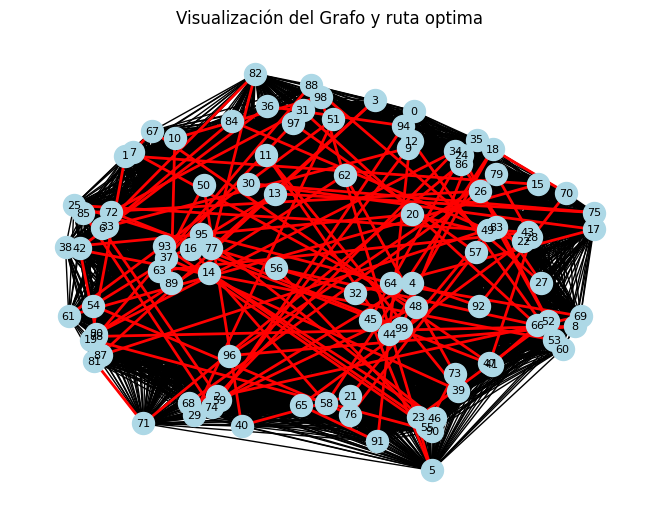

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

edges_to_highlight = [(i, j) for (i, j) in model0.A if value(model0.x[i, j]) > 0.5]
# Crear un grafo
G = nx.Graph()

# Agregar aristas con pesos (distancias) al grafo
for (i, j), n in costos0.items():
    G.add_edge(i, j, weight=n)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Define la disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=250, font_size=8)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size= 5, )
nx.draw_networkx_edges(G, pos, edgelist=edges_to_highlight, edge_color='red', width=2)

print(" → ".join(str(n) for n in ruta))
print(f"Costo total mínimo: {value(model0.obj)}")
plt.title("Visualización del Grafo y ruta optima")
plt.show()

# Punto 3

In [17]:
#Crear el modelo
model3 = AbstractModel()

#Variables de decision
model3.h = Var(bounds=(0.0, None)) # Altura
model3.a = Var(bounds=(0.0, None)) # Ancho
model3.l = Var(bounds=(0.0, None)) # Largo

#Funcion objetivo
model3.obj = Objective(expr = model3.h * model3.a * model3.l, sense=maximize)

#Restriccion
model3.Rest1 = Constraint(expr = model3.h + 2*model3.a + 2*model3.l <= 72)  # suma de su altura y el perímetro de su base no exceda de 72 cm
model3.Rest2 = Constraint(expr = model3.h <= 42) # h menor a 42 cm
model3.Rest3 = Constraint(expr = model3.a <= 42) # a menor a 42 cm
model3.Rest4 = Constraint(expr = model3.l <= 42) # l menor a 42 cm

#opt = SolverFactory('ipopt')
opt = SolverFactory('ipopt', executable='/content/ipopt')
instance = model3.create_instance()
results = opt.solve(instance)

print(f'Funcion objetivo = {value(instance.obj):.2f}')
print(f'h= {value(instance.h):.2f}, a=  {value(instance.a):.2f}, l=  {value(instance.l):.2f}')
print(f'Solver exit status {results.solver.termination_condition.name}')

Funcion objetivo = 3456.00
h= 24.00, a=  12.00, l=  12.00
Solver exit status optimal
